Para la realización del Adaline y de su versión de Gradiente Descendente Estocástico se realizo los siguientes pasos.

1. Se instalo las librerias necesarias para el entorno de Google colab, despues se importo las librerias.

In [ ]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn
from sklearn import datasets

2. Para la clase Adeline se completo el código faltante del metódo fit, siguiendo el siguiente algoritmo:  
## Algoritmo de entrenamiento:
    1.   Inicializar los pesos
    2.   Calcular la entrada a la neurona
    3.   Calcular la salida con la función de activación
    4.   Actualizar los pesos incrementalmente para cada una de las muestras del conjunto de entrenamiento
    5.   Repetir los pasos 2 al 4 hasta que las salidas reales y las deseables sean iguales para todos los vectores del conjunto de entrenamiento
    


Para el método partial_fit se modifoco su estructura para poder recuperar los errores que nos permiticen obtener los errores acumulados de las muestras, y que en el método fit nos permitiece calcular los costos en cada epoca del entrenamiento del modelo.

In [ ]:
class AdalineSGD(object):

        """ADAptive LInear NEuron classifier.
        Parameters
        ------------
        eta : float
           Learning rate (between 0.0 and 1.0)
        n_iter : int
           Passes over the training dataset.
        shuffle : bool (default: True)
           Shuffles training data every epoch if True to prevent
           cycles.
        random_state : int
           Random number generator seed for random weight
           initialization.
        Attributes
        -----------
        w_ : 1d-array
           Weights after fitting.
        cost_ : list
           Sum-of-squares cost function value averaged over all
           training examples in each epoch.
        """
        def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
           self.eta = eta
           self.n_iter = n_iter
           self.w_initialized = False
           self.shuffle = shuffle
           self.random_state = random_state

        def fit(self, X, y):
            """ Fit training data.
            Parameters
            ----------
            X : {array-like}, shape = [n_examples, n_features]
                Training vectors, where n_examples is the number of
                examples and n_features is the number of features.
            y : array-like, shape = [n_examples]
                Target values.
            Returns
            -------
            self : object
            """
            self._initialize_weights(X.shape[1])
            self.cost_ = []
            for epoch in range(self.n_iter):
                X,y = self._shuffle(X,y)
                # se actualizan los pesos incrementalmente para cada una de las
                # muestras del conjunto de entrenamiento y se añade a la lista  costo
                self, costo = self.partial_fit(X,y)
                # Costo por cada epoca
                avg_cost = np.sum(costo) / len(y)
                # Se agrega el costo para usarlo en la graficación
                self.cost_.append(avg_cost)

        def partial_fit(self, X, y):
            """Fit training data without reinitializing the weights"""
            costo = []
            if not self.w_initialized:
                self._initialize_weights(X.shape[1])
            if y.ravel().shape[0] > 1:
                for xi, target in zip(X, y):
                    costo.append(self._update_weights(xi, target))
            else:
                costo=self._update_weights(X, y)
            return self,costo

        def _shuffle(self, X, y):
            """Shuffle training data"""
            r = self.rgen.permutation(len(y))
            return X[r], y[r]


        def _initialize_weights(self, m):
            """Initialize weights to small random numbers"""
            self.rgen = np.random.RandomState(self.random_state)
            self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
            self.w_initialized = True


        def _update_weights(self, xi, target):
            """Apply Adaline learning rule to update the weights"""
            output = self.activation(self.net_input(xi))
            error = (target - output)
            self.w_[1:] += self.eta * xi.dot(error)
            self.w_[0] += self.eta * error
            cost = 0.5 * error**2
            return cost


        def net_input(self, X):
            """Calculate net input"""
            return np.dot(X, self.w_[1:]) + self.w_[0]


        def activation(self, X):
            """Compute linear activation"""
            return X


        def predict(self, X):
            """Return class label after unit step"""
            return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


3. Se cargan los datos de la librería de scikit-learn y se seleccionan los datos de la clase setosa y versicolor y se grafica.

<function matplotlib.pyplot.show(close=None, block=None)>

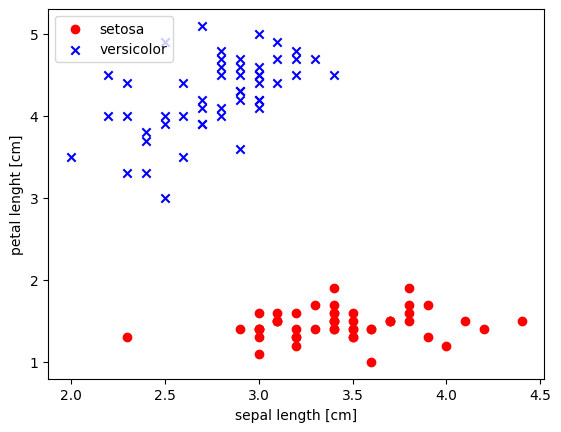

In [ ]:
# Datos del conjunto Iris
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Select setosa and versicolor
X = X[0:100,[1,2]]
y = Y[0:100]
y[:50] =-1
y[50:100] =1

#plot data
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show

4. Se normalizan los datos para que todos se encuentren dentro de un mismo rango y se lleva a cabo el entreniento de los datos.

In [ ]:
# Estandarización de los datos
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Entrenamiento de los datos
ada1 = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada1.fit(X_std, y)



5. Se grafican los datos y se obtine la linea de desicion asi como los errores ocurridos en cada época del entrenamiento del modelo.

In [ ]:
# Grafica de los datos sepal length and petal length
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor='black')

<ipython-input-35-d23150490440>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor='black')


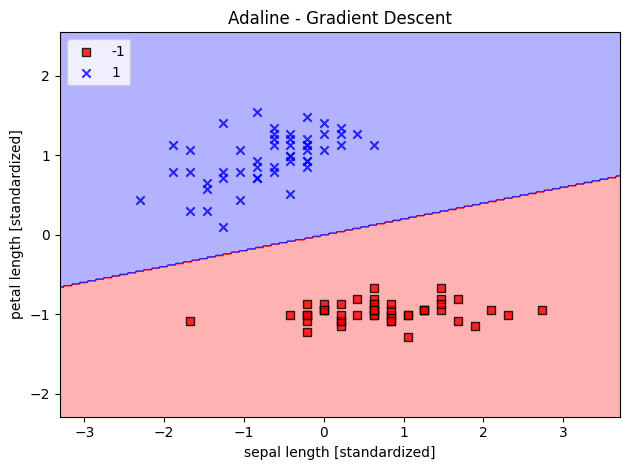

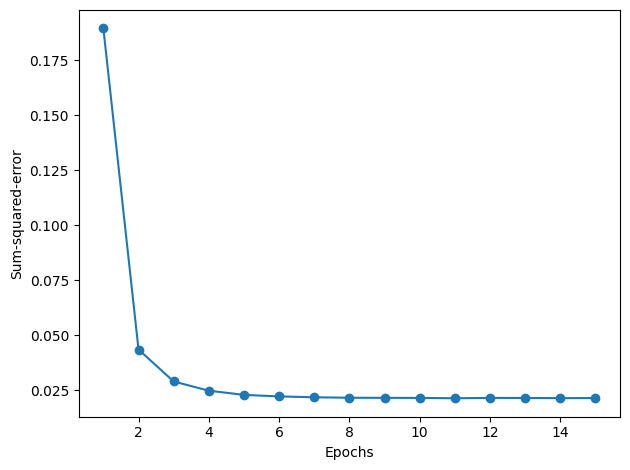

In [ ]:
# Se agrega  el titulo de la grafica y de los ejes x,y
plot_decision_regions(X_std, y, classifier=ada1)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# Grafica de los costos por epoca
plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()